In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [32]:
data3 = pd.read_csv("HLT (1).csv")
data4 = pd.read_csv("HLT.csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [33]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2015-01-19,53.105759,55.198799,52.264439,54.501122,52.674477,6841700
1,2015-01-26,54.521641,55.280880,53.208359,53.290440,51.504364,10575500
2,2015-02-02,53.352001,55.917000,52.428600,54.090721,52.277836,12833400
3,2015-02-09,54.111240,59.384880,53.762402,58.625641,56.660759,19443800
4,2015-02-16,58.625641,59.302799,57.230282,58.174198,56.224449,11727200


In [34]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
484,2020-08-24,125.801789,119.910810,131.593551
485,2020-08-25,125.909385,120.380568,131.737417
486,2020-08-26,126.019599,120.136301,132.120601
487,2020-08-27,126.132303,119.846055,132.070406
488,2020-08-28,126.247376,120.672087,132.115167


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

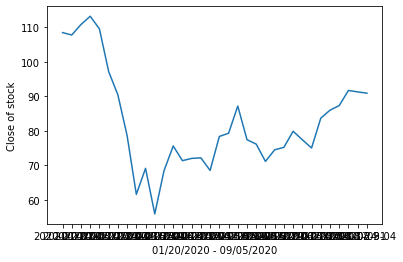

In [36]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

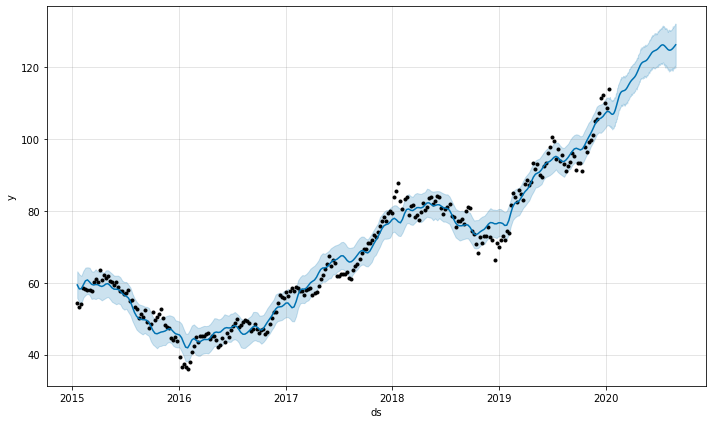

In [37]:
fig1 = m4.plot(forecast)

In [38]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,84.529999,88.699997,84.199997,86.000000,86.000000,14390800
30,2020-08-17,86.070000,87.440002,83.120003,87.349998,87.349998,10770900
31,2020-08-24,87.849998,92.059998,86.699997,91.730003,91.730003,14356400
32,2020-08-31,91.610001,93.849998,89.010002,91.300003,91.300003,11667200
33,2020-09-04,92.680000,93.389999,90.750000,90.940002,90.940002,3531677


In [39]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
484,2020-08-24,127.601385,119.910810,131.593551,123.405276,131.935623,-1.799596,-1.799596,-1.799596,-1.799596,-1.799596,-1.799596,0.0,0.0,0.0,125.801789
485,2020-08-25,127.686362,120.380568,131.737417,123.449752,132.046035,-1.776978,-1.776978,-1.776978,-1.776978,-1.776978,-1.776978,0.0,0.0,0.0,125.909385
486,2020-08-26,127.771339,120.136301,132.120601,123.474115,132.155912,-1.751740,-1.751740,-1.751740,-1.751740,-1.751740,-1.751740,0.0,0.0,0.0,126.019599
487,2020-08-27,127.856316,119.846055,132.070406,123.532294,132.263750,-1.724012,-1.724012,-1.724012,-1.724012,-1.724012,-1.724012,0.0,0.0,0.0,126.132303
488,2020-08-28,127.941293,120.672087,132.115167,123.590473,132.360993,-1.693917,-1.693917,-1.693917,-1.693917,-1.693917,-1.693917,0.0,0.0,0.0,126.247376


In [1]:
hilton_impact = (104.820000 - 156.898501)/156.898501 * 100
print("Hilton's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", hilton_impact, "% as of \n09/05/2020")

Hilton's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 -33.19247836536056 % as of 
09/05/2020
